<a href="https://colab.research.google.com/github/AaravWattal/RRAM-Models/blob/main/FINAL_SET_MDN_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Datasets


In [ ]:
# Imports
import numpy as np
import pandas as pd
from time import time

# Scikit-learn stuff
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [ ]:
# Get conductange range data from file set_sweep.csv
names = ["addr", "pw", "vwl", "vbsl", "preread", "postread"]
data = pd.read_csv("/content/set_sweep.csv", names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,151240.470700,115068.986900
1,2,2.000000e-08,0.5,1.0,123855.302200,124977.565700
2,4,2.000000e-08,0.5,1.5,127236.989700,106676.196700
3,6,2.000000e-08,0.5,2.0,93031.982770,133852.645200
4,8,2.000000e-08,0.5,2.5,75606.517090,57549.247700
5,10,2.000000e-08,0.5,3.0,97572.302250,92171.401490
6,12,2.000000e-08,0.6,0.5,46314.963040,50373.876070
7,14,2.000000e-08,0.6,1.0,100303.315400,149505.440600
8,16,2.000000e-08,0.6,1.5,212694.720700,75614.854910
9,18,2.000000e-08,0.6,2.0,5747.716015,5608.268993


In [ ]:
# data = pd.read_csv("/content/reset_sweep.tsv", sep='\t', names=names)
# data.head(20)

# Data Preprocessing

Let us first convert resistance values (pre-read and post-read) to conductance values, and scale each column so that the maximum value is 1.

In [ ]:
# Convert resistance to conductance
data['preread'] = 1 / data['preread']
data['postread'] = 1 / data['postread']

In [ ]:
# Creating scaled versions of the columns which have very large or very small scales
data['scaled_pw'] = data['pw'] / np.max(data['pw'])
data['scaled_preread'] = data['preread'] / np.max(data['preread'])
data['scaled_postread'] = data['postread'] / np.max(data['postread'])

In [ ]:
# Take a peek at the preprocessed data
data.head(20)

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread
0,0,2.000000e-08,0.5,0.5,0.000007,0.000009,0.01,0.034318,0.044375
1,2,2.000000e-08,0.5,1.0,0.000008,0.000008,0.01,0.041906,0.040857
2,4,2.000000e-08,0.5,1.5,0.000008,0.000009,0.01,0.040792,0.047866
3,6,2.000000e-08,0.5,2.0,0.000011,0.000007,0.01,0.055790,0.038148
4,8,2.000000e-08,0.5,2.5,0.000013,0.000017,0.01,0.068648,0.088728
5,10,2.000000e-08,0.5,3.0,0.000010,0.000011,0.01,0.053194,0.055399
6,12,2.000000e-08,0.6,0.5,0.000022,0.000020,0.01,0.112064,0.101366
7,14,2.000000e-08,0.6,1.0,0.000010,0.000007,0.01,0.051746,0.034154
8,16,2.000000e-08,0.6,1.5,0.000005,0.000013,0.01,0.024402,0.067529
9,18,2.000000e-08,0.6,2.0,0.000174,0.000178,0.01,0.903011,0.910478


### Train Test Split
Here, we make a 70%-30% split of the data into training and testing datasets

In [ ]:
# Train-test 70%-30% split
x = data[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = data["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
print(x,"\n",y)

[[0.03431788 0.01       0.5        0.5       ]
 [0.04190577 0.01       0.5        1.        ]
 [0.040792   0.01       0.5        1.5       ]
 ...
 [0.05514082 0.01       0.5        3.        ]
 [0.07995579 0.01       0.6        0.5       ]
 [0.05964901 0.01       0.6        1.        ]] 
 [0.04437516 0.04085697 0.04786639 ... 0.07144795 0.06633775 0.04164925]


###Standard Data Fitting Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
#  def generate_data(n_samples):
#     epsilon = np.random.normal(size=(n_samples))
#     x_data = np.random.uniform(-10.5, 10.5, n_samples)
#     y_data = 7*np.sin(0.75*x_data) + 0.5*x_data + epsilon
#     return x_data, y_data
    
# n_samples = 9831
# x_data, y_data = generate_data(n_samples)
# print(type(x_data))

n_samples = 32768

In [ ]:
n_input = 4
n_hidden = 20
n_output = 1

network = nn.Sequential(nn.Linear(n_input, n_hidden),
                        nn.ReLU(),
                        nn.Linear(n_hidden, n_output))
network = network.cuda()

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(network.parameters())

In [ ]:
X_train

array([[0.05667327, 0.5       , 2.3       , 1.5       ],
       [0.0324172 , 0.1       , 3.1       , 0.5       ],
       [0.05935437, 0.5       , 1.        , 1.        ],
       ...,
       [0.04290688, 0.2       , 2.8       , 1.5       ],
       [0.05041831, 0.1       , 2.7       , 2.        ],
       [0.14262499, 0.5       , 1.7       , 1.5       ]])

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [ ]:
def train():
    for epoch in range(3000):
        y_pred = network(x_train_variable.float()) # make a prediction
        loss = loss_fn(y_pred, y_train_variable.float()) # compute the loss
        optimizer.zero_grad() # prepare the optimizer
        loss.backward() # compute the contribution of each parameter to the loss
        optimizer.step() # modify the parameters

        if epoch % 300 == 0:
            print(epoch, loss.data)

train()

0 tensor(0.6912, device='cuda:0')


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([24576])) that is different to the input size (torch.Size([24576, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


300 tensor(0.1039, device='cuda:0')
600 tensor(0.1030, device='cuda:0')
900 tensor(0.1027, device='cuda:0')
1200 tensor(0.1026, device='cuda:0')
1500 tensor(0.1025, device='cuda:0')
1800 tensor(0.1025, device='cuda:0')
2100 tensor(0.1025, device='cuda:0')
2400 tensor(0.1025, device='cuda:0')
2700 tensor(0.1025, device='cuda:0')


In [ ]:
network.eval()
output = network(x_test_tensor.float())
print(output)

tensor([[0.4794],
        [0.4794],
        [0.4794],
        ...,
        [0.4794],
        [0.4794],
        [0.4794]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
print(output.flatten())

tensor([0.4794, 0.4794, 0.4794,  ..., 0.4794, 0.4794, 0.4794], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)


In [ ]:
squared_error = (((output.flatten() - y_test_tensor)*(output.flatten() - y_test_tensor))/len(output)).sum().data
print(squared_error)

tensor(0.1024, device='cuda:0', dtype=torch.float64)


In [ ]:
print(np.sqrt(squared_error.cpu()))

tensor(0.3200, dtype=torch.float64)


In [ ]:
del(squared_error)
del(output)

###MDN

In [ ]:
class MDN(nn.Module):
    def __init__(self, n_hidden, n_gaussians):
        super(MDN, self).__init__()
        self.z_h = nn.Sequential(
            nn.Linear(4, n_hidden),
            nn.Tanh()
        )
        self.z_pi = nn.Linear(n_hidden, n_gaussians)
        self.z_sigma = nn.Linear(n_hidden, n_gaussians)
        self.z_mu = nn.Linear(n_hidden, n_gaussians)  

    def forward(self, x):
        z_h = self.z_h(x)
        pi = nn.functional.softmax(self.z_pi(z_h), -1)
        sigma = torch.exp(self.z_sigma(z_h))
        mu = self.z_mu(z_h)
        return pi, sigma, mu

In [ ]:
oneDivSqrtTwoPI = 1.0 / np.sqrt(2.0*np.pi) # normalization factor for Gaussians
def gaussian_distribution(y, mu, sigma):
    # make |mu|=K copies of y, subtract mu, divide by sigma
    print(y.shape)
    print(mu.shape)
    print(sigma.shape)
    result = (y.expand_as(mu) - mu) * torch.reciprocal(sigma)
    print(result.shape)
    result = -0.5 * (result * result)
    return (torch.exp(result) * torch.reciprocal(sigma)) * oneDivSqrtTwoPI

def mdn_loss_fn(pi, sigma, mu, y):
    result = gaussian_distribution(y, mu, sigma) * pi
    #result = torch.sum(result, dim=1)
    result = -torch.log(result)
    return torch.mean(result)

In [ ]:
network = MDN(n_hidden=10, n_gaussians=1)
network = network.cuda()
optimizer = torch.optim.Adam(network.parameters())

In [ ]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [ ]:
len(y_train)

24576

In [ ]:
batch_size = 64
num_batches = int(len(y_train)/batch_size)
# network.fit(X_train, y_train, epochs=300, )

In [ ]:
torch.cuda.empty_cache()

In [ ]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved

In [ ]:
def train_mdn():
    for epoch in range(10000):
      # for batch in range(num_batches):
        pi_variable, sigma_variable, mu_variable = network(x_train_variable.float())
        loss = mdn_loss_fn(pi_variable[:,0], sigma_variable[:,0], mu_variable[:,0], y_train_variable)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(epoch, loss.data)

train_mdn()

Streaming output truncated to the last 5000 lines.
torch.Size([24576])
torch.Size([24576])
tensor(-1.5164, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
9000 tensor(-1.5164, device='cuda:0', dtype=torch.float64)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5165, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5165, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5165, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5165, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5165, device='cuda:0', dtype=torch.float64, g

In [ ]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.0540],
        [0.0481],
        [0.0620],
        ...,
        [0.0674],
        [0.0824],
        [0.0717]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[0.8253],
        [0.8677],
        [0.7349],
        ...,
        [0.0805],
        [0.6652],
        [0.7533]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [ ]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(squared_error)
print(np.sqrt(squared_error.item()))

tensor(0.0042, device='cuda:0', dtype=torch.float64)
0.06452694350358164


In [ ]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([-0.0079], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([1.0410], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.0076, device='cuda:0', dtype=torch.float64)
tensor(0.9997, device='cuda:0', dtype=torch.float64)
8192
8192


In [ ]:
print((mu_variable-y_test_tensor).shape)

torch.Size([8192, 8192])


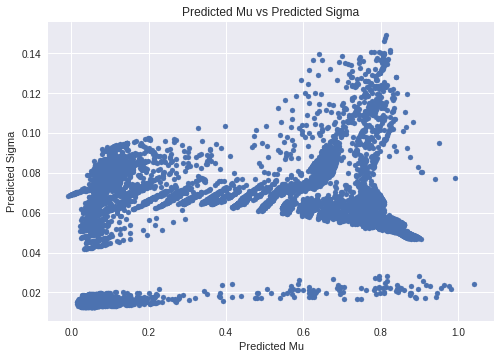

In [ ]:
#note: useless graph, this literally serves no purpose
plt.style.use('seaborn')
plt.title("Predicted Mu vs Predicted Sigma")
plt.xlabel("Predicted Mu")
plt.ylabel("Predicted Sigma");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25);

In [ ]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(8192,)

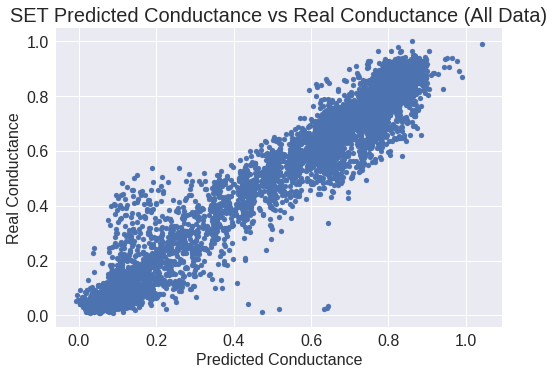

In [ ]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (All Data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [ ]:
#CORRELATION COEFFICIENT
import numpy as np
x = np.array(mu_variable.cpu().detach().numpy()[:,0])
y = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x,y)

array([[1.        , 0.97949548],
       [0.97949548, 1.        ]])

#Color Graphs

2339
2331
3522


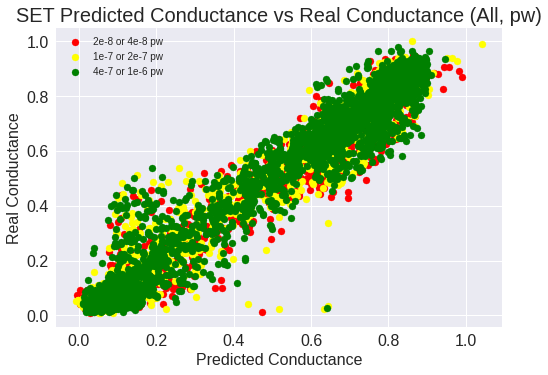

In [ ]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]==0.01 or X_test[i][1]==0.02):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][1]==0.05 or X_test[i][1]==0.1):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])
      
print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (All, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x1, y1, c="red", label='2e-8 or 4e-8 pw')
plt.scatter(x2, y2, c="yellow", label='1e-7 or 2e-7 pw')
plt.scatter(x3, y3, c="green", label='4e-7 or 1e-6 pw')
plt.legend()

2729
2776
2687


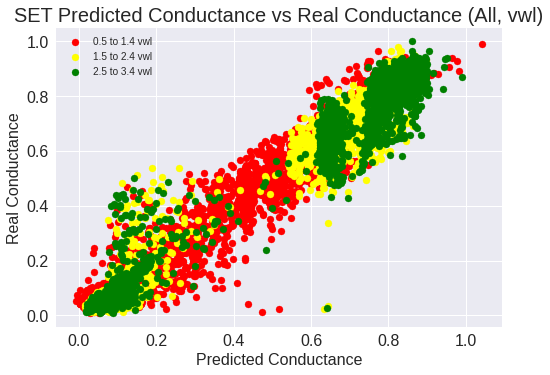

In [ ]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into three lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2] and X_test[i][2]<=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2] and X_test[i][2]<=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (All, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

0
1654
1922


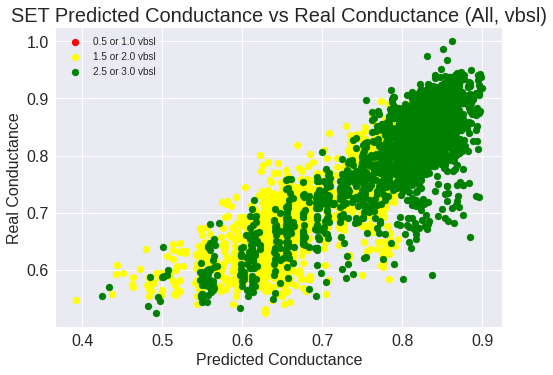

In [ ]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (All, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()

#50 PERCENT

In [ ]:
subtr_df = data[np.abs(data['scaled_preread'] - data['scaled_postread']) >= 0.5]
subtr_df

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread
46,92,2.000000e-08,1.2,2.5,0.000010,0.000117,0.01,0.052877,0.595374
47,94,2.000000e-08,1.2,3.0,0.000011,0.000130,0.01,0.055367,0.663543
51,102,2.000000e-08,1.3,2.0,0.000007,0.000119,0.01,0.036685,0.607948
52,104,2.000000e-08,1.3,2.5,0.000012,0.000139,0.01,0.062256,0.712036
56,112,2.000000e-08,1.4,1.5,0.000006,0.000113,0.01,0.032252,0.578200
...,...,...,...,...,...,...,...,...,...
32753,65506,2.000000e-06,3.3,3.0,0.000017,0.000167,1.00,0.089709,0.852628
32756,65512,2.000000e-06,3.4,1.5,0.000008,0.000124,1.00,0.042824,0.635402
32757,65514,2.000000e-06,3.4,2.0,0.000021,0.000147,1.00,0.108055,0.750463
32758,65516,2.000000e-06,3.4,2.5,0.000005,0.000155,1.00,0.028018,0.793074


In [ ]:
# Train-test 70%-30% split
x = subtr_df[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = subtr_df["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [ ]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.0809],
        [0.0636],
        [0.0551],
        ...,
        [0.0867],
        [0.0592],
        [0.0660]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[0.6424],
        [0.6107],
        [0.8245],
        ...,
        [0.6344],
        [0.6110],
        [0.7873]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [ ]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(np.sqrt(squared_error.item()))

0.05093820455857656


In [ ]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([0.3918], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([0.8995], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.5245, device='cuda:0', dtype=torch.float64)
tensor(0.9997, device='cuda:0', dtype=torch.float64)
3576
3576


In [ ]:
print((mu_variable-y_test_tensor).shape)

torch.Size([3576, 3576])


In [ ]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(3576,)

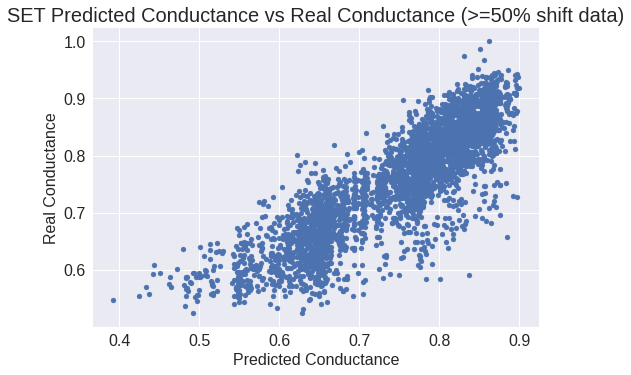

In [ ]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (>=50% shift data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [ ]:
import numpy as np
x2 = np.array(mu_variable.cpu().detach().numpy()[:,0])
y2 = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x2,y2)

array([[1.        , 0.86118079],
       [0.86118079, 1.        ]])

#Color Graphs

1015
1012
1549


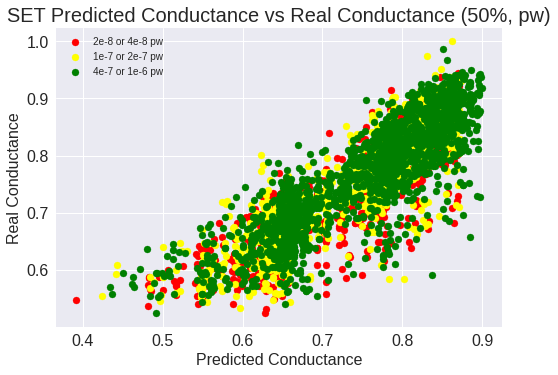

In [ ]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]==0.01 or X_test[i][1]==0.02):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][1]==0.05 or X_test[i][1]==0.1):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (50%, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x1, y1, c="red", label='2e-8 or 4e-8 pw')
plt.scatter(x2, y2, c="yellow", label='1e-7 or 2e-7 pw')
plt.scatter(x3, y3, c="green", label='4e-7 or 1e-6 pw')
plt.legend()

435
1508
1633


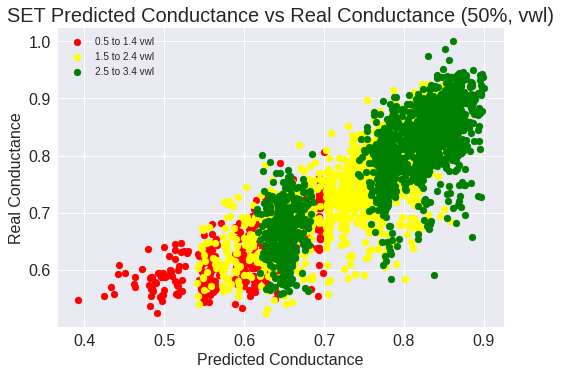

In [ ]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2] and X_test[i][2]<=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2] and X_test[i][2]<=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (50%, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

0
1654
1922


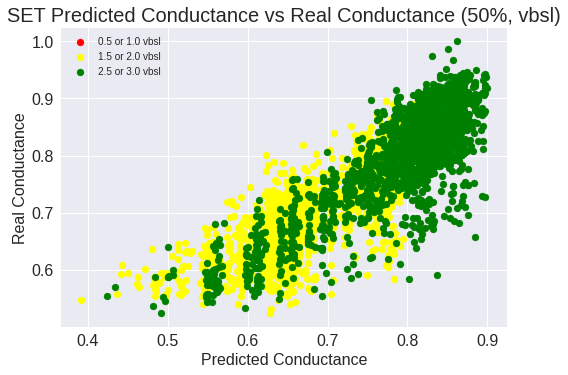

In [ ]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (50%, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()

#5 PERCENT

In [ ]:
ten_df = data[np.abs(data['scaled_preread'] - data['scaled_postread']) <= 0.05]
ten_df

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread
0,0,2.000000e-08,0.5,0.5,0.000007,0.000009,0.01,0.034318,0.044375
1,2,2.000000e-08,0.5,1.0,0.000008,0.000008,0.01,0.041906,0.040857
2,4,2.000000e-08,0.5,1.5,0.000008,0.000009,0.01,0.040792,0.047866
3,6,2.000000e-08,0.5,2.0,0.000011,0.000007,0.01,0.055790,0.038148
4,8,2.000000e-08,0.5,2.5,0.000013,0.000017,0.01,0.068648,0.088728
...,...,...,...,...,...,...,...,...,...
32763,65526,2.000000e-08,0.5,2.0,0.000009,0.000011,0.01,0.047479,0.054263
32764,65528,2.000000e-08,0.5,2.5,0.000009,0.000009,0.01,0.045670,0.045872
32765,65530,2.000000e-08,0.5,3.0,0.000011,0.000014,0.01,0.055141,0.071448
32766,65532,2.000000e-08,0.6,0.5,0.000015,0.000013,0.01,0.079956,0.066338


In [ ]:
# Train-test 70%-30% split
x = ten_df[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = ten_df["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [ ]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.0149],
        [0.0708],
        [0.0716],
        ...,
        [0.0495],
        [0.0170],
        [0.0941]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[0.0804],
        [0.0369],
        [0.0472],
        ...,
        [0.0629],
        [0.0618],
        [0.1403]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [ ]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(squared_error)
print(np.sqrt(squared_error.item()))

tensor(0.0029, device='cuda:0', dtype=torch.float64)
0.05400132277033652


In [ ]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([-0.0128], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([0.9674], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.0082, device='cuda:0', dtype=torch.float64)
tensor(0.9850, device='cuda:0', dtype=torch.float64)
3106
3106


In [ ]:
print((mu_variable-y_test_tensor).shape)

torch.Size([3106, 3106])


In [ ]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(3106,)

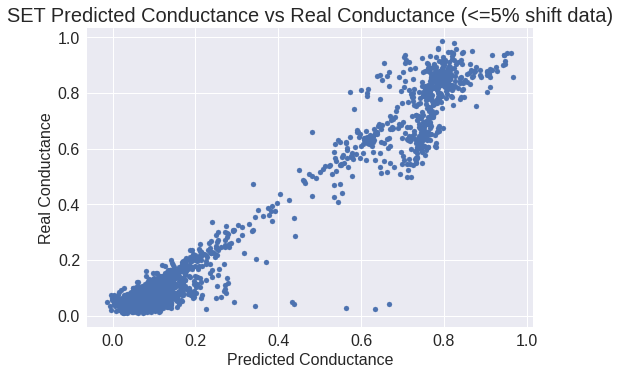

In [ ]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (<=5% shift data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [ ]:
import numpy as np
x3 = np.array(mu_variable.cpu().detach().numpy()[:,0])
y3 = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x3,y3)

array([[1.        , 0.98006426],
       [0.98006426, 1.        ]])

#Color Graphs

918
898
1290


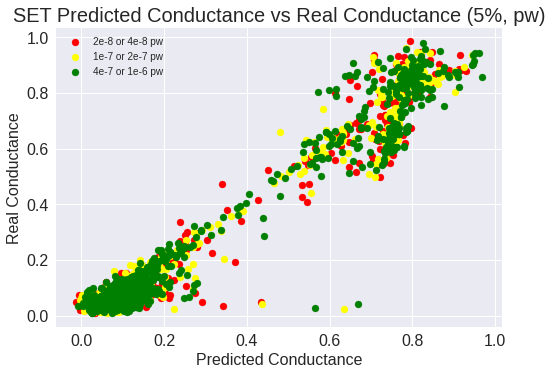

In [ ]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]==0.01 or X_test[i][1]==0.02):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][1]==0.05 or X_test[i][1]==0.1):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (5%, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x1, y1, c="red", label='2e-8 or 4e-8 pw')
plt.scatter(x2, y2, c="yellow", label='1e-7 or 2e-7 pw')
plt.scatter(x3, y3, c="green", label='4e-7 or 1e-6 pw')
plt.legend()

1243
942
921


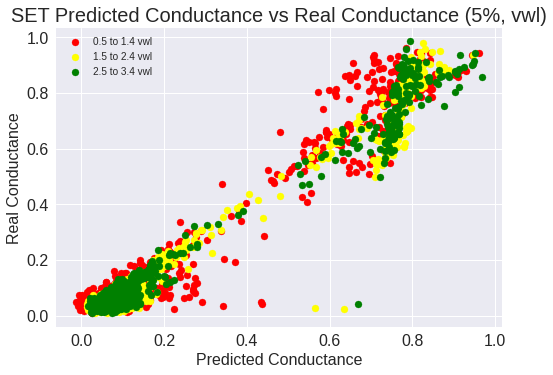

In [ ]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2] and X_test[i][2]<=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2] and X_test[i][2]<=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (5%, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

2477
376
253


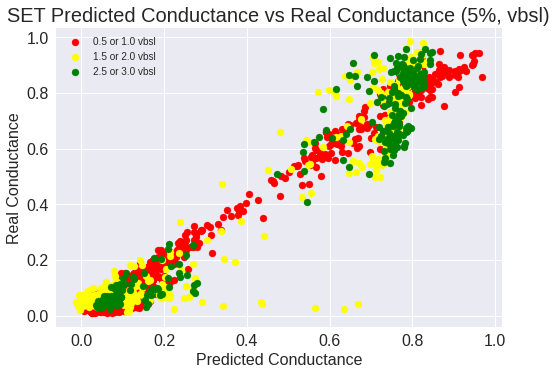

In [ ]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (5%, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()